In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import sys
import numpy as np # linear algebra
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import glob as glob
from sklearn import model_selection, preprocessing, ensemble
from scipy import stats
from datetime import datetime
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction import image
from PIL import Image
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v

In [2]:
# set train_df as the training dataframe
train_df = pd.read_json("train.json")

# look at the first 25 rows of training data
train_df.head(25)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low
16,1.0,3,300d27d8ba2adbcbc8c6f2bcbc1c6f9d,2016-06-28 05:59:06,This spectacular converted 3 bed apartment all...,East 16th Street,"[Doorman, Elevator, Loft, Dishwasher, Hardwood...",40.7348,7226687,-73.9865,30a7951cfc21240e8c46b2d079d292e5,[https://photos.renthop.com/2/7226687_4ea22bf1...,7200,145 East 16th Street,low
18,2.0,3,0d01cabe55fa5192cdbcabd5c585c1ea,2016-06-08 06:21:36,AMAZING DEAL!! BRAND NEW RENOVATIONS IN THIS H...,East 13th Street,"[Fireplace, Laundry in Unit, Dishwasher, Hardw...",40.7302,7126989,-73.9826,9f39caedae295bf81e67463e6fd0af40,[https://photos.renthop.com/2/7126989_a74ab3da...,6000,410 East 13th Street,low
19,1.0,0,d48767c37a934daaf0bbb0e58c755d0c,2016-06-05 05:28:22,No Fee Large Renovated Sun Splashed Studio. Wa...,York Avenue,"[Elevator, Laundry in Building, Dishwasher, Ha...",40.7769,7114138,-73.9467,9cbfa7a31ae9dfba70b4383636d99788,[https://photos.renthop.com/2/7114138_68d035c3...,1945,1661 York Avenue,high
23,0.0,1,d1ca33a2853e64fad6e4009d5d5d168f,2016-06-09 04:42:03,Extra large one bedroom apartment located in P...,E 19 Street,[Hardwood Floors],40.7346,7131094,-73.9811,b89e62bf8cdc98e9fb8b97d9bc627197,[https://photos.renthop.com/2/7131094_2117d8a9...,2435,346 E 19 Street,low
32,3.0,3,5f35dc2f0191baf109221752e6ee0c48,2016-06-28 03:26:18,Listed: 06/26/16<br /><br />Available:...,Hicks Street,"[Cats Allowed, Dogs Allowed]",40.6990,7224815,-73.9943,d5d246c9d9d4e7079e5a0fc962d2f1a7,[https://photos.renthop.com/2/7224815_8ff8a811...,6850,94 Hicks Street,low


In [3]:
test_df = pd.read_json("test.json")
train_df.info()
print("# of train rows : ", train_df.shape[0])
print("# of test rows : ", test_df.shape[0])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
interest_level     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB
# of train rows :  49352
# of test rows :  74659


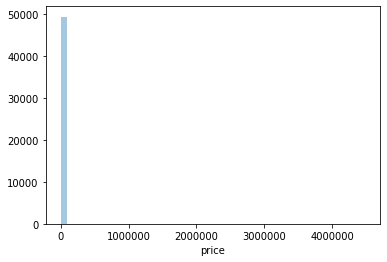

In [4]:
# Plot histograms for the following numeric columns: Price, Latitude & Longitude
# None of the histograms are very useful due to outliers

sns.distplot(train_df['price'], kde = False)

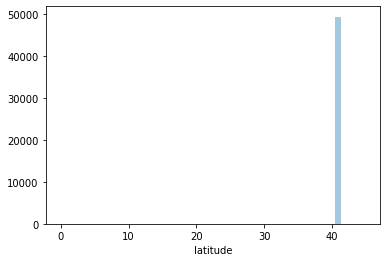

In [5]:
sns.distplot(train_df['latitude'], kde = False)

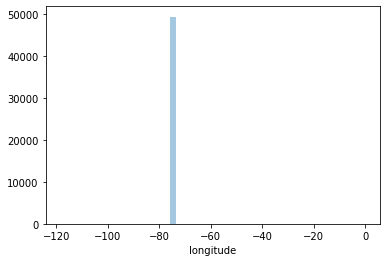

In [6]:
sns.distplot(train_df['longitude'], kde = False)

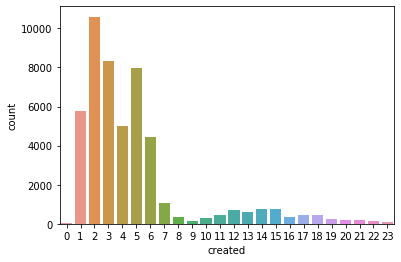

In [7]:
# Plot hour-wise listing trend and find out the top 5 busiest hours of postings

train_df['created'] = pd.to_datetime(train_df['created'])

sns.countplot(train_df.created.dt.hour)

# the five busiest hours of postings are (in decreasing order): 2 AM, 3 AM, 5 AM, 2 AM, 4 AM

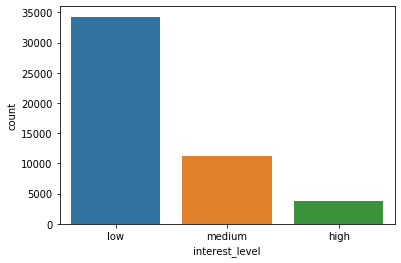

In [8]:
# Visualization to show the proportion of target variable values

sns.countplot(train_df['interest_level'], order=['low','medium','high'])

# Most properties have an interest level of low, which makes sense. The properties with higher interest levels
# will be sold off first

In [9]:
# !!!Find the number of missing values in each variable
# bathrooms	bedrooms	building_id	created	description	display_address	features	latitude	listing_id	longitude	manager_id	photos	price	street_address	interest_level
# number of null values in each variable
latitude_count = 0
longitude_count = 0
price_count = 0
bedroom_count = 0
bathroom_count = 0
building_id_count = 0
created_count = 0
display_address_count = 0
description_count = 0
features_count = 0;
manager_id_count = 0
photos_count = 0
street_address_count = 0
interest_level_count = 0
listing_id_count = 0;

print ("TOTAL MISSING VALUES")
for b in train_df['latitude']:
    if b == 0:
        latitude_count += 1
        #print(b)
print ("Latitude : ", latitude_count)

for b in train_df['listing_id']:
    if b == 0:
        listing_id_count += 1
        #print(b)
print ("listing_id ", listing_id_count)

# bedroom and bathroom can be zero!!! Have to fix these two
for b in train_df['bedrooms']:
    if b == 0 or isinstance(b, int) == False:
        bedroom_count += 1
        #print(b)
print ("bedrooms", bedroom_count)

for b in train_df['bathrooms']:
    if b == 0 or isinstance(b, float) == False:
        bathroom_count += 1
        #print(b)
print ("bathrooms", bathroom_count)
#

for b in train_df['longitude']:
    if b == 0:
        longitude_count += 1
        #print(b)
print ("longitude", longitude_count)

for b in train_df['price']:
    if b == 0:
        price_count += 1
        #print(b)
print ("price", price_count)

for b in train_df['building_id']:
    if b == "":
        building_id_count += 1
        #print(b)
print ("building_id", building_id_count)


#length of date format is 19
for b in train_df['created']:
    if b == "":
        created_count += 1
        #print(b)
print ("created", created_count)

for b in train_df['description']:
    if b == "" or b is None or len(b) < 4: # shows irrelevant data for len < 4
        description_count += 1
        #print(b)
print ("description", description_count)

for b in train_df['display_address']:
    if b == "" or len(b) < 3: # displays irrelevant value for len < 3
        #print(b)
        display_address_count += 1
        #print(b)
print ("display_address", display_address_count)

for b in train_df['features']:
    if b == "":
        features_count += 1
        #print(b)
print ("features", features_count)

for b in train_df['manager_id']:
    if b == "" or b is None:
        manager_id_count += 1
        #print(b)
print ("manager_id", manager_id_count)

for b in train_df['photos']:
    if b == "" or b is None:
        photos_count += 1
        #print(b)
print ("photos", photos_count)

for b in train_df['street_address']:
    if b == "" or len(b) < 4: # Found garbage value "hi5"
        #print(b)
        street_address_count += 1
        #print(b)
print ("street_address", street_address_count)

for b in train_df['interest_level']:
    if b == "" or b is None:
        interest_level_count += 1
        #print(b)
print ("interest_level", interest_level_count)

#for b in train_df['features']:
 #   print(b)


TOTAL MISSING VALUES
Latitude :  12
listing_id  0
bedrooms 9475
bathrooms 313
longitude 12
price 0
building_id 0
created 0
description 1686
display_address 137
features 0
manager_id 0
photos 0
street_address 11
interest_level 0


In [10]:
# Find out the number of outliers in each variable

z = np.abs(stats.zscore(train_df[['bedrooms', 'bathrooms', 'latitude', 'longitude', 'price']]))

threshold = 3

outliers = np.where(z>threshold)
outliersRow = outliers[0]
outliersCol = outliers[1]

bedrooms_outliers = 0 
bathrooms_outliers = 0
latitude_outliers = 0
longitude_outliers = 0 
price_outliers = 0

for val in outliersCol:
    if val == 0:
        bedrooms_outliers += 1
    elif val == 1:
        bathrooms_outliers += 1
    elif val == 2:
        latitude_outliers += 1
    elif val == 3:
        longitude_outliers += 1
    else:
        price_outliers += 1

print('TOTAL OUTLIERS')
print('bedrooms : ', bedrooms_outliers)
print('bathrooms : ', bathrooms_outliers)
print('latitude : ', latitude_outliers)
print('longitude : ', longitude_outliers)
print('price : ', price_outliers)



TOTAL OUTLIERS
bedrooms :  297
bathrooms :  1035
latitude :  18
longitude :  16
price :  10


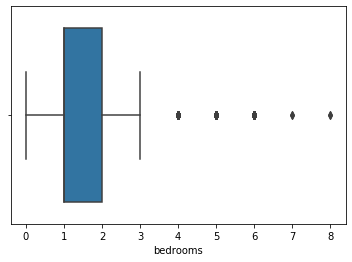

In [11]:
# Plot visualizations to demonstrate outliers

sns.boxplot(x = train_df['bedrooms'])

True


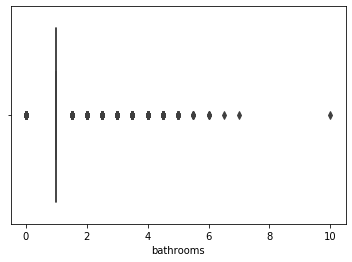

In [12]:
temp = "6"
print(temp.isdigit())
sns.boxplot(x = train_df['bathrooms'])

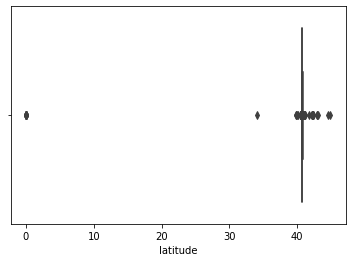

In [13]:
sns.boxplot(x = train_df['latitude'])

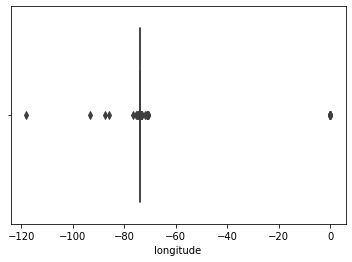

In [14]:
sns.boxplot(x = train_df['longitude'])

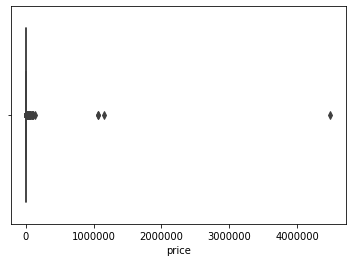

In [15]:
sns.boxplot(x = train_df['price'])

In [16]:
# Find outliers using Z-score
# look through latitude, longitude, price

z = np.abs(stats.zscore(train_df[['latitude', 'longitude', 'price']]))
threshold = 3

# Remove outliers from these columns with a z-score greater than 3
train_df_o = train_df[(z<threshold).all(axis=1)]

z = np.abs(stats.zscore(train_df_o[['bedrooms', 'bathrooms']]))
# Remove outliers from bedrooms and bathrooms with very high z-score
# we do this because these attributes are integers and highly concentrated. i.e. most properties only have 1-2 bedrooms and 1 bathroom
# therefore, we only need to get rid of the farthest outliers to get good results
train_df_o = train_df_o[(z<5).all(axis=1)]

print(train_df.shape)
print(train_df_o.shape)

train_df = train_df_o

(49352, 15)
(49105, 15)


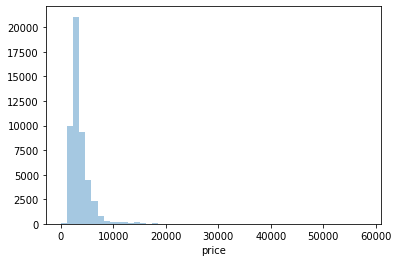

In [17]:
# Plot histograms for the following numeric columns:
# Price

sns.distplot(train_df['price'], kde = False)

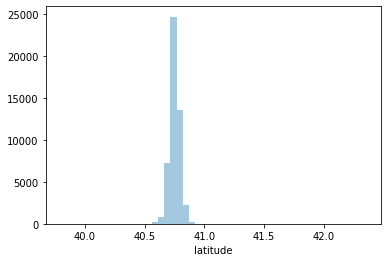

In [18]:
# Latitude

sns.distplot(train_df['latitude'], kde = False)

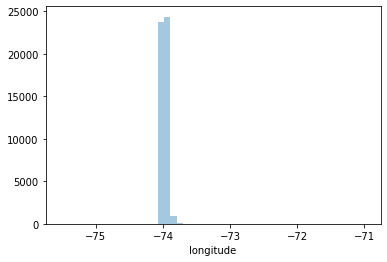

In [19]:
#Longitide

sns.distplot(train_df['longitude'], kde = False)

In [20]:
# !!!Can we safely drop the missing values? If not, how will you deal with them?

In [21]:
# Extract features from the images and transform it into data that’s ready to be used in the model for classification.

# Feature 1: Grayscale pixel values      ~~~ Commented out due to memory issues ~~~
#grayscale_feat_list = []
#for filename in glob.glob('images_sample/*/*.jpg'):
#    img = imread(filename, as_gray=True)
#    imgFeature = np.reshape(img, (img.shape[0]*img.shape[1]))    
#    grayscale_feat_list.append(imgFeature)


# Feature 2: Channel mean pixel values
mean_pix_list = []
for filename in glob.glob('images_sample/*/*.jpg'):
    colorImg = imread(filename)
    print(filename)
    feat_matrix = np.zeros((colorImg.shape[0], colorImg.shape[1]))
    for i in range(0, colorImg.shape[0]):
        for j in range(0, colorImg.shape[1]):
                feat_matrix[i][j] = ((int(colorImg[i,j,0]) + int(colorImg[i,j,1]) + int(colorImg[i,j,2]))/3)
    feature = np.reshape(feat_matrix, (colorImg.shape[0]*colorImg.shape[1]))
    mean_pix_list.append(feature)


images_sample/6812051/6812051_9f259eddfad8d6132ca244eef93c032c.jpg
images_sample/6812051/6812051_39ff9c3d4ad420d0af796d4e5494e214.jpg
images_sample/6812051/6812051_ce903c679367895359ee62d3e6cf8e30.jpg
images_sample/6812051/6812051_e575f7ad244ee22e8636621f4a048fe1.jpg
images_sample/6812263/6812263_f915711a0a6ed454d8651a04115a0b06.jpg
images_sample/6812263/6812263_6800f5df431f4f740c1083c85ac574df.jpg
images_sample/6812263/6812263_e877c0aac354f7dcf886290e89ac0554.jpg
images_sample/6812263/6812263_f8cfc41477571a1747122bc2f23ae2f8.jpg
images_sample/6812263/6812263_01314c92c181bc0413c78ce09fb0131f.jpg
images_sample/6812263/6812263_b36e4e916397362e8c21bf13f54c3ff5.jpg
images_sample/6812264/6812264_592884358e5872635cea50ac2b29e02b.jpg
images_sample/6812264/6812264_5ef7523d5e0689f2e4c577638bdff7e0.jpg
images_sample/6812201/6812201_f5fc24f860dc7472f198f37e94842a4b.jpg
images_sample/6812201/6812201_024498afbe9a099d77ff7ffd1e540dd5.jpg
images_sample/6812201/6812201_018ba92df59514823dd9fd1c3bd98fac

images_sample/6812107/6812107_891645a8b9516dc856c9aa11ceb31351.jpg
images_sample/6812107/6812107_a6df0466922ac243b42aac83fae5c6d2.jpg
images_sample/6812107/6812107_c0a697cd32cf263bf524a8f7f9c1d8c2.jpg
images_sample/6812107/6812107_5d80390ef7f4e0301c51a2137144fd57.jpg
images_sample/6812107/6812107_2c4fd4c0c603dc0d541db39c0c54a714.jpg
images_sample/6812107/6812107_8ae176e194131d5890f8f54420ad3402.jpg
images_sample/6812154/6812154_32a0b556465bcc57fac44cbe021b2309.jpg
images_sample/6812154/6812154_94dfc464958640f9e9bfb8e7b3550b42.jpg
images_sample/6811984/6811984_c6ec69f49ae463422633b872fa5ad801.jpg
images_sample/6811984/6811984_c9af68161ea672f0bc8a8a11775f0fab.jpg
images_sample/6811984/6811984_08bf619d7e2150c577b3ab2ec3906dba.jpg
images_sample/6811984/6811984_1c14c8ac05f5e04c8665f03570aa371a.jpg
images_sample/6811984/6811984_07aab16f822c3c6e5cdc07801388b101.jpg
images_sample/6812198/6812198_5b5310d37bf641f8e7a942c6a37438b3.jpg
images_sample/6812198/6812198_306f0a995ac5334b6278d82f85c5b0e6

images_sample/6812186/6812186_b854dd1c5f97ab4d6aa29d9122769d55.jpg
images_sample/6812186/6812186_9f66ebd9eabd966a7570f1386cb407fb.jpg
images_sample/6812186/6812186_60ce234e51be21e8027aad85ce3f04f6.jpg
images_sample/6812186/6812186_747853d31738324814da563d850a6831.jpg
images_sample/6812186/6812186_5c194a37a9be8ded4e188c9d96acc502.jpg
images_sample/6812186/6812186_8008267470bbb6166048f3dd92c38aa0.jpg
images_sample/6812186/6812186_b98d28c9fde0fd8861b971c002c8ba97.jpg
images_sample/6812186/6812186_8479e9c9ce0d6bcc2ba1be2ea708a259.jpg
images_sample/6812186/6812186_6240672f4e9d6ccb1ff927b9d701a2a8.jpg
images_sample/6812186/6812186_1447b164c1132f9911bc55048909fe9f.jpg
images_sample/6811960/6811960_c79be28076dcb1fa25b5991f57cafaf2.jpg
images_sample/6811960/6811960_c2a540f2cb5bd97229ebf307a6667d0f.jpg
images_sample/6811960/6811960_f1d2937c0554db92aea6b98a858a57db.jpg
images_sample/6811960/6811960_a3bd517552d4163c4732c4bd5334b2e0.jpg
images_sample/6811960/6811960_3685d3542328b820980642535d8ccb72

images_sample/6812103/6812103_7d93a7de88928fc3b3d9b61d435c04d5.jpg
images_sample/6812103/6812103_a8cb210ed85852238da601dc301e57d7.jpg
images_sample/6812103/6812103_fab8f9d2ba09d0c0801d95fcdb5f3d3b.jpg
images_sample/6812103/6812103_ee3917a43955ca1f0da2ac9304556b7f.jpg
images_sample/6812103/6812103_ae67830410af47210129fe109f386ecd.jpg
images_sample/6812135/6812135_5d0075abd6067e99ff75bd5c68f8e332.jpg
images_sample/6812049/6812049_c60655f678ca381bdc8dd1f06424e086.jpg
images_sample/6812049/6812049_c09649643477c651f2d4bb733e7abec6.jpg
images_sample/6812049/6812049_d364ae4f4dd5ce34c07eea73420bb33c.jpg
images_sample/6812049/6812049_dc6cd261cb5554b4beb6a46e84309218.jpg
images_sample/6812049/6812049_a74ab51699f608535888d0918629e22d.jpg
images_sample/6812243/6812243_c91706eb3ed7176f2203297ceeb299ba.jpg
images_sample/6812243/6812243_e5ddf20a1ca257066c59ba5fe5a7bf3c.jpg
images_sample/6812243/6812243_3a4b584a209483a400262181fffa2e5d.jpg
images_sample/6812243/6812243_33d8cae95b1e5e08fbf4ee44d9a4cb1a

In [22]:
# Extract features from the text data and transform it into data that's ready to be used in the model for classification

# number of photos
train_df['num_photos'] = train_df['photos'].apply(len)
test_df['num_photos'] = test_df['photos'].apply(len)

# number of features
train_df['num_features'] = train_df['features'].apply(len)
test_df['num_features'] = test_df['features'].apply(len)

# get hour, day, month, year
train_df['hour'] = train_df.created.dt.hour
train_df['day'] = train_df.created.dt.day
train_df['month'] = train_df.created.dt.month
train_df['year'] = train_df.created.dt.year

test_df['created'] = pd.to_datetime(test_df['created'])
test_df['hour'] = test_df.created.dt.hour
test_df['day'] = test_df.created.dt.day
test_df['month'] = test_df.created.dt.month
test_df['year'] = test_df.created.dt.year

# use label encoder to normalize labels
categorical = ["display_address", "manager_id", "building_id", "street_address"]
for f in categorical:
    le = preprocessing.LabelEncoder()
    le.fit(list(train_df[f].values) + list(test_df[f].values))
    train_df[f] = le.transform(list(train_df[f].values))
    test_df[f] = le.transform(list(test_df[f].values))

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49105 entries, 4 to 124009
Data columns (total 21 columns):
bathrooms          49105 non-null float64
bedrooms           49105 non-null int64
building_id        49105 non-null int64
created            49105 non-null datetime64[ns]
description        49105 non-null object
display_address    49105 non-null int64
features           49105 non-null object
latitude           49105 non-null float64
listing_id         49105 non-null int64
longitude          49105 non-null float64
manager_id         49105 non-null int64
photos             49105 non-null object
price              49105 non-null int64
street_address     49105 non-null int64
interest_level     49105 non-null object
num_photos         49105 non-null int64
num_features       49105 non-null int64
hour               49105 non-null int64
day                49105 non-null int64
month              49105 non-null int64
year               49105 non-null int64
dtypes: datetime64[ns](1), floa